## Import libraries and data

In [1]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime as dt
import seaborn as sns
from dash import Dash, dcc, html
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\Drew\New_York_CitiBike\02 Data\Prepared Data\CitiBike_NOAA_Rides.csv", dtype={5: 'str', 7: 'str'}, index_col=0)

In [3]:
df.dtypes

rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
number_of_rides         int64
_merge                 object
tripduration          float64
gender                 object
dtype: object

In [4]:
# Change date column to datetime format

df['date'] = pd.to_datetime(df['date'])

In [5]:
# changing started_at and ended_at to datetime objects
# pd.to_datetime() is used to ensure that started_at and ended_at are in datetime format.
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

## Setting theme and color palette

In [6]:
sns.set_theme(style = "whitegrid", palette = "Set2")

### Reason for theme and color palette selections

    "Whitegrid" will offer a clean grid background that will be effective for interpreting both categorical and numerical data, especially for bar charts, box plots, and line plots.

    "Set2" will offer a number of  subtle colors that should work well with a variety of different visualizations without overpowering or being distracting. 

## Task 2.3 Graphs redone with seaborn

In [7]:
df_temp = df.set_index('date')

In [8]:
# Ensure df_temp is sorted by date

df_temp = df_temp.sort_values(by='date')

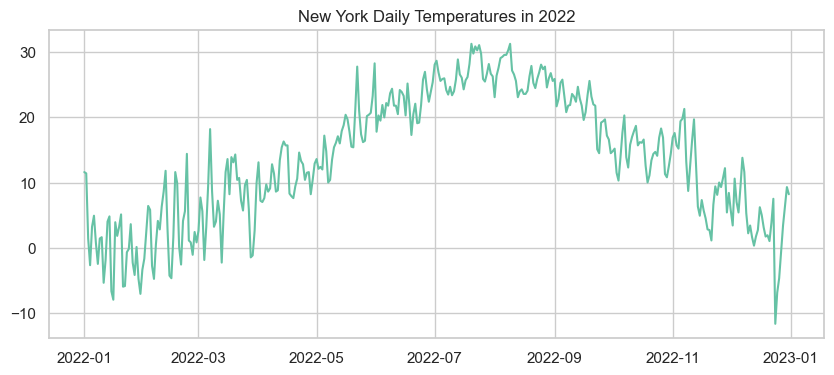

In [9]:
plt.figure(figsize=(10,4))
plt.title('New York Daily Temperatures in 2022')
plt.plot(df_temp['avgTemp'])
plt.show()

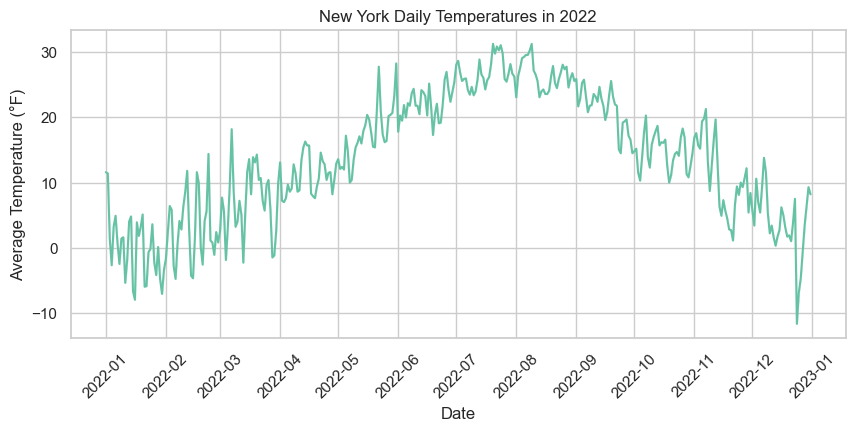

In [10]:
# plotting line of daily temperatures using seaborn instead of Matplotlib

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_temp, x=df_temp.index, y="avgTemp")
plt.title('New York Daily Temperatures in 2022')
plt.xlabel("Date")
plt.ylabel("Average Temperature (°F)")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

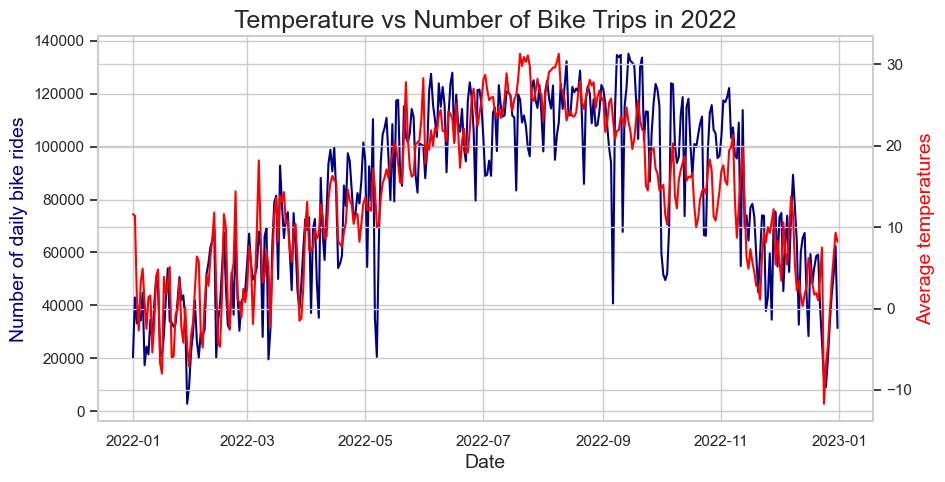

In [11]:
# Create figure and axis objects with subplots() and details using Matplotlib

fig1,ax = plt.subplots(figsize=(10, 5))

# plot of the bike rides

ax.plot(df_temp['number_of_rides'],color = "navy")
ax.set_xlabel("Date", fontsize = 14) # set x-axis
ax.set_ylabel("Number of daily bike rides",color = "navy", fontsize = 14) # set y-axis

# create the dual axis for two different y-axis on the x-axis plot

ax2 = ax.twinx()

# plot with the daily temperatues on the y-axis using second axis object

ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature vs Number of Bike Trips in 2022', fontsize = 18)
plt.show()

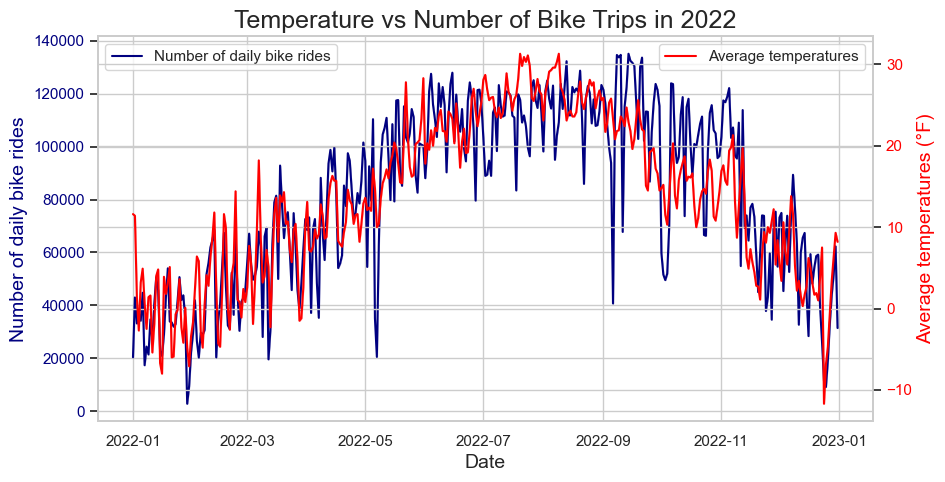

In [12]:
# Create figure and axis objects with subplots() and details using Seaborn

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the first line with Seaborn for the number of rides
sns.lineplot(data=df_temp, x=df_temp.index, y='number_of_rides', ax=ax, color="navy", label="Number of daily bike rides")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Number of daily bike rides", color="navy", fontsize=14)
ax.tick_params(axis='y', labelcolor="navy")

# Create the dual axis for the average temperature
ax2 = ax.twinx()
sns.lineplot(data=df_temp, x=df_temp.index, y='avgTemp', ax=ax2, color="red", label="Average temperatures")
ax2.set_ylabel("Average temperatures (°F)", color="red", fontsize=14)
ax2.tick_params(axis='y', labelcolor="red")

# Set title
plt.title("Temperature vs Number of Bike Trips in 2022", fontsize=18)

# Show plot
plt.show()

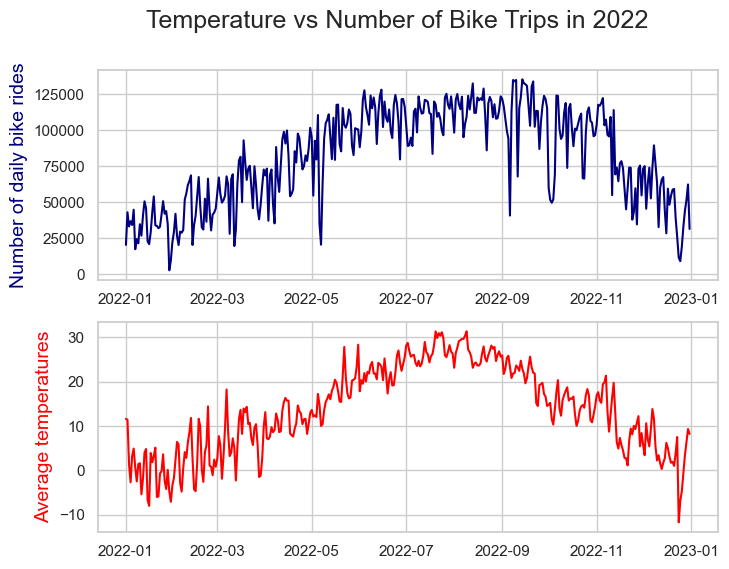

In [13]:
# Create a figure with two subplots (stacked vertically) using Matplotlib

fig2,ax = plt.subplots(2, figsize =(8, 6))

# plot number of daily bike rides
ax[0].plot(df_temp['number_of_rides'],color = "navy")
ax[0].set_ylabel("Number of daily bike rides",color = "navy", fontsize = 14) # set y-axis label

# plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature vs Number of Bike Trips in 2022', fontsize = 18)

plt.show()

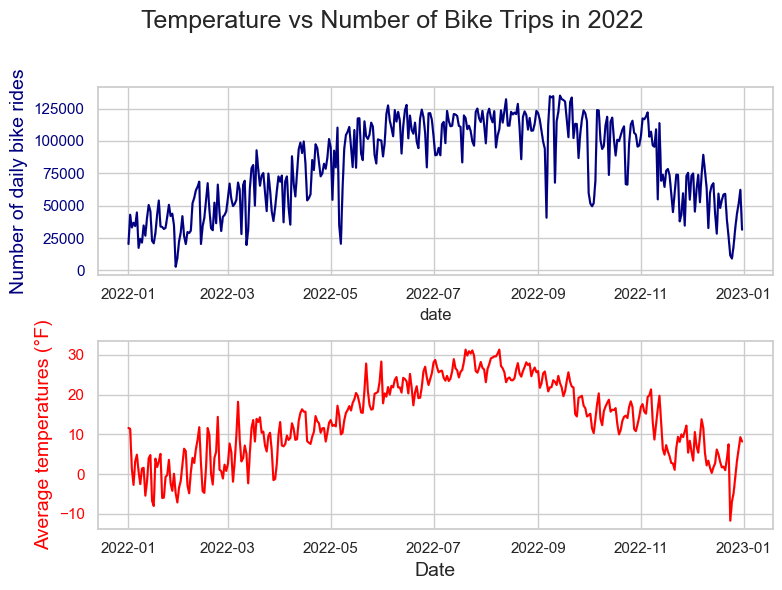

In [14]:
# Create a figure with two subplots (stacked vertically) using Seaborn
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Plot the number of daily bike rides on the first subplot
sns.lineplot(data=df_temp, x=df_temp.index, y='number_of_rides', ax=ax[0], color="navy")
ax[0].set_ylabel("Number of daily bike rides", color="navy", fontsize=14)
ax[0].tick_params(axis='y', labelcolor="navy")

# Plot the average temperature on the second subplot
sns.lineplot(data=df_temp, x=df_temp.index, y='avgTemp', ax=ax[1], color="red")
ax[1].set_ylabel("Average temperatures (°F)", color="red", fontsize=14)
ax[1].tick_params(axis='y', labelcolor="red")

# Set the x-axis label for the bottom plot
ax[1].set_xlabel("Date", fontsize=14)

# Set a shared title for both plots
fig.suptitle("Temperature vs Number of Bike Trips in 2022", fontsize=18)

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

C:\Users\Drew\anaconda3\envs\New_York_CitiBike\Lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


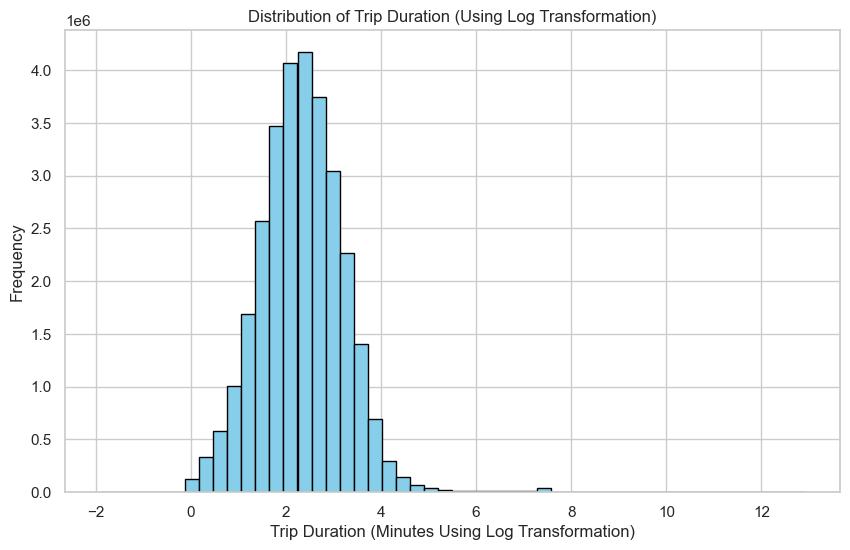

In [15]:
# Apply a log transformation to the trip duration to reduce skewness
filtered_df = df[['tripduration']].copy()
filtered_df['log_tripduration'] = np.log(df['tripduration']) # Natural log transformation (base e=2.718)

# Creating histogram with log-transformed data using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['log_tripduration'], bins=50, color='skyblue', edgecolor='black', density=False)

# Explanation of x-axis:
# The x-axis represents the natural log of the trip duration (in minutes). 
# If you want to find the original trip duration for a specific x-value, you need to take the exponent (base e).
# For example, to find the original value for an x-axis value of 2:
# original_duration = e^2 ≈ 7.39 minutes (using e ≈ 2.718; x-axis 2 would then be 2.718 * 2.718 for a 7.38 minute bike trip)
plt.xlabel('Trip Duration (Minutes Using Log Transformation)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration (Using Log Transformation)')
plt.show()

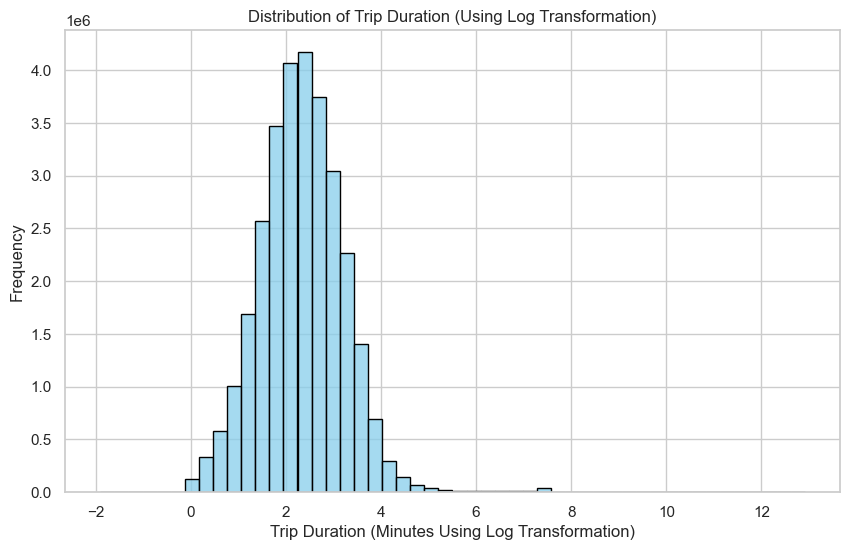

In [16]:
# Creating histogram with Seaborn's histplot
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['log_tripduration'], bins=50, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Trip Duration (Minutes Using Log Transformation)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration (Using Log Transformation)')
plt.show()

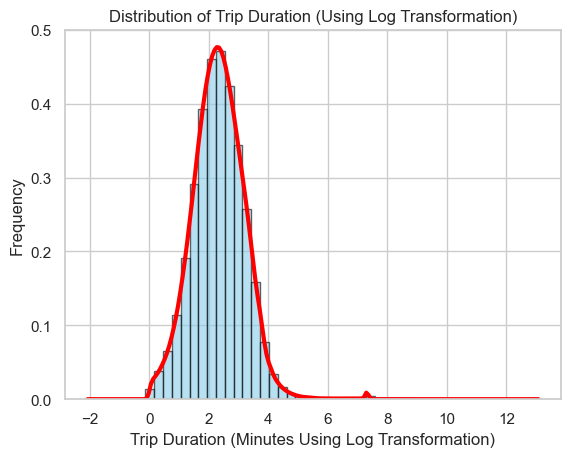

In [17]:
# Creating histogram with log-transformed data using Seaborn
plt.hist(filtered_df['log_tripduration'], bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.6)

# Add the KDE curve separately with adjustments
sns.kdeplot(filtered_df['log_tripduration'], color='red', linewidth=3, bw_adjust=2)

# Explanation of x-axis:
# The x-axis represents the natural log of the trip duration (in minutes).
# If you want to find the original trip duration for a specific x-value, you need to take the exponent (base e).
# For example, to find the original value for an x-axis value of 2:
# original_duration = e^2 ≈ 7.39 minutes (using e = 2.718; x-axis 2 would then be 2.718 * 2.718 for a 7.38 minute bike trip)

plt.xlabel('Trip Duration (Minutes Using Log Transformation)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration (Using Log Transformation)')
plt.show()

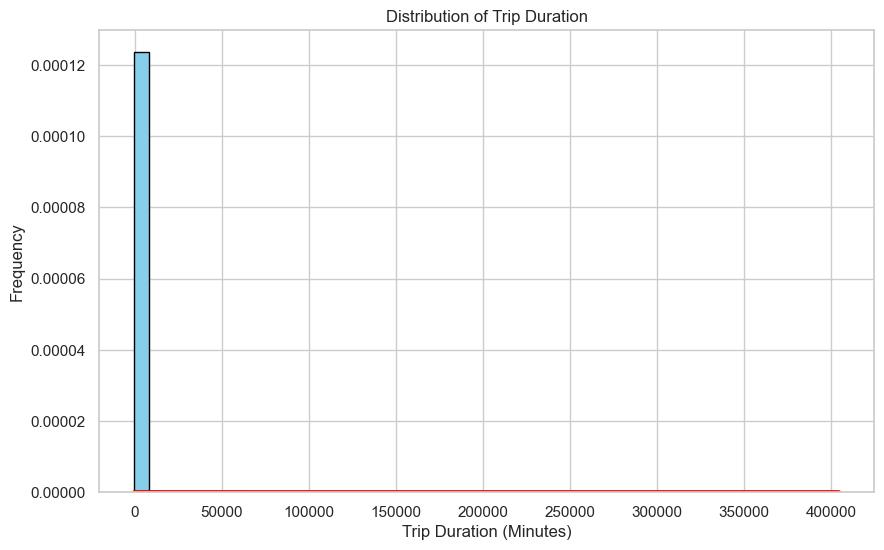

In [18]:
# Creating histogram with raw tripduration data using Seaborn
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['tripduration'], bins=50, color='skyblue', edgecolor='black', density=True)

# Add the KDE curve separately with adjustments
sns.kdeplot(filtered_df['tripduration'], color='red', linewidth=3, bw_adjust=2)

# Explanation of x-axis:
# The x-axis now represents the original trip duration (in minutes)
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()

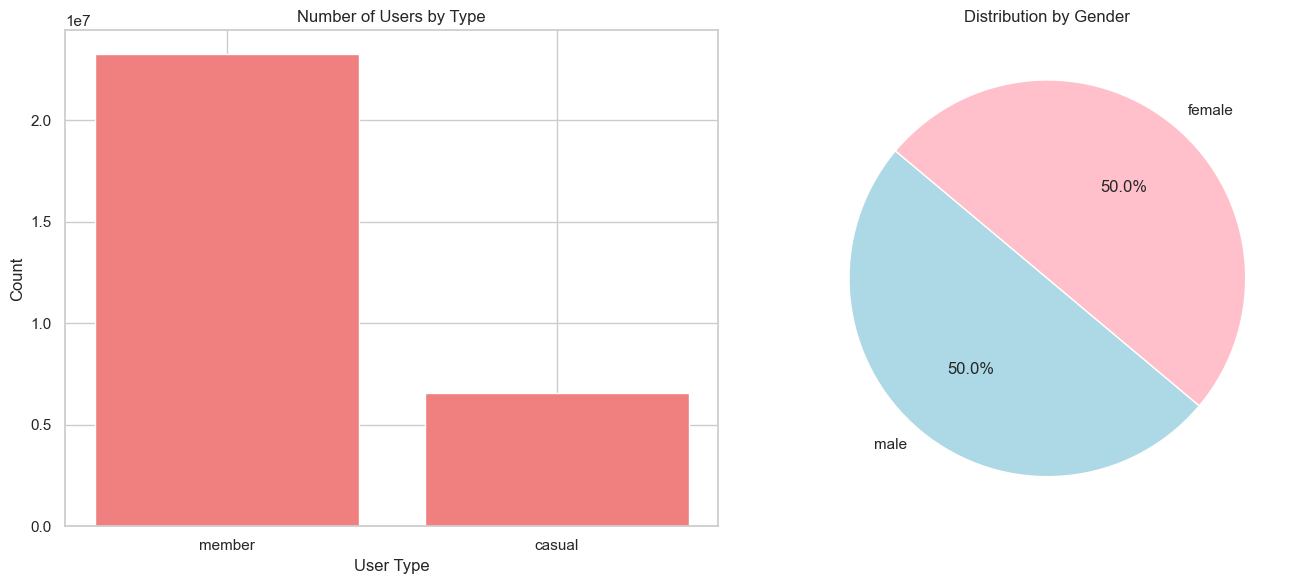

In [19]:
# Prepare data for plots
usertype_counts = df['member_casual'].value_counts()
gender_counts = df['gender'].value_counts() # Count the number of occurrences of each gender

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for usertype using Matplotlib
ax1.bar(usertype_counts.index, usertype_counts.values, color='lightcoral')
ax1.set_title('Number of Users by Type')
ax1.set_xlabel('User Type')
ax1.set_ylabel('Count')

# Pie chart for gender using Matplotlib
# `autopct='%1.1f%%'` displays percentages with 1 decimal place
# `startangle=140` starts the pie chart at an angle to make it more visually appealing
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
ax2.set_title('Distribution by Gender')

# Display the plots
plt.tight_layout()
plt.show()

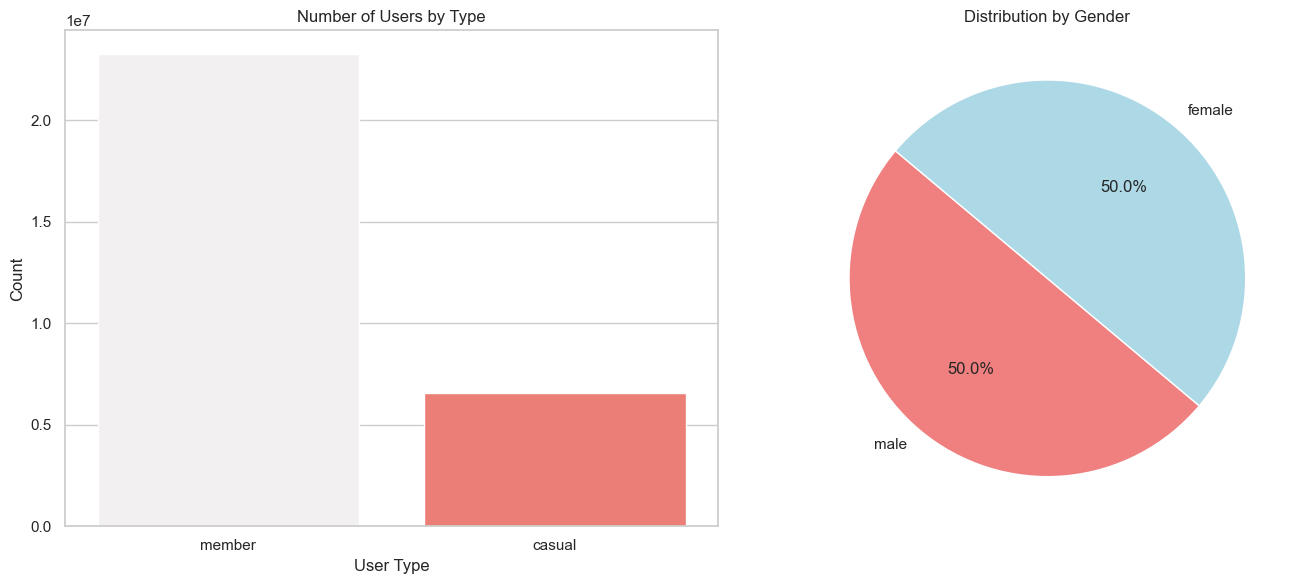

In [20]:
# Create figure and adjust layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot bar chart for user type on the first subplot
sns.barplot(x=usertype_counts.index, y=usertype_counts.values, ax=axes[0], palette="light:#FF6F61")
axes[0].set_title('Number of Users by Type')
axes[0].set_xlabel('User Type')
axes[0].set_ylabel('Count')

# Plot pie chart for gender on the second subplot
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
axes[1].set_title('Distribution by Gender')

# Adjust layout for a clean display
plt.tight_layout()
plt.show()

## Bar chart of top 20 starting stations

In [21]:
df_t = df.groupby('start_station_name').size().reset_index(name='start_station_count')

In [22]:
df_t.head()

,start_station_name,start_station_count
0,1 Ave & E 110 St,21526
1,1 Ave & E 16 St,67349
2,1 Ave & E 18 St,70854
3,1 Ave & E 30 St,45412
4,1 Ave & E 39 St,52373


In [23]:
top20 = df_t.nlargest(20, 'start_station_count')

In [24]:
top20.head(25)

,start_station_name,start_station_count
1587,W 21 St & 6 Ave,129016
1718,West St & Chambers St,123289
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856
461,Broadway & E 14 St,98862
485,Broadway & W 25 St,98422
1511,University Pl & E 14 St,97120
463,Broadway & E 21 St,95691
1603,W 31 St & 7 Ave,94208


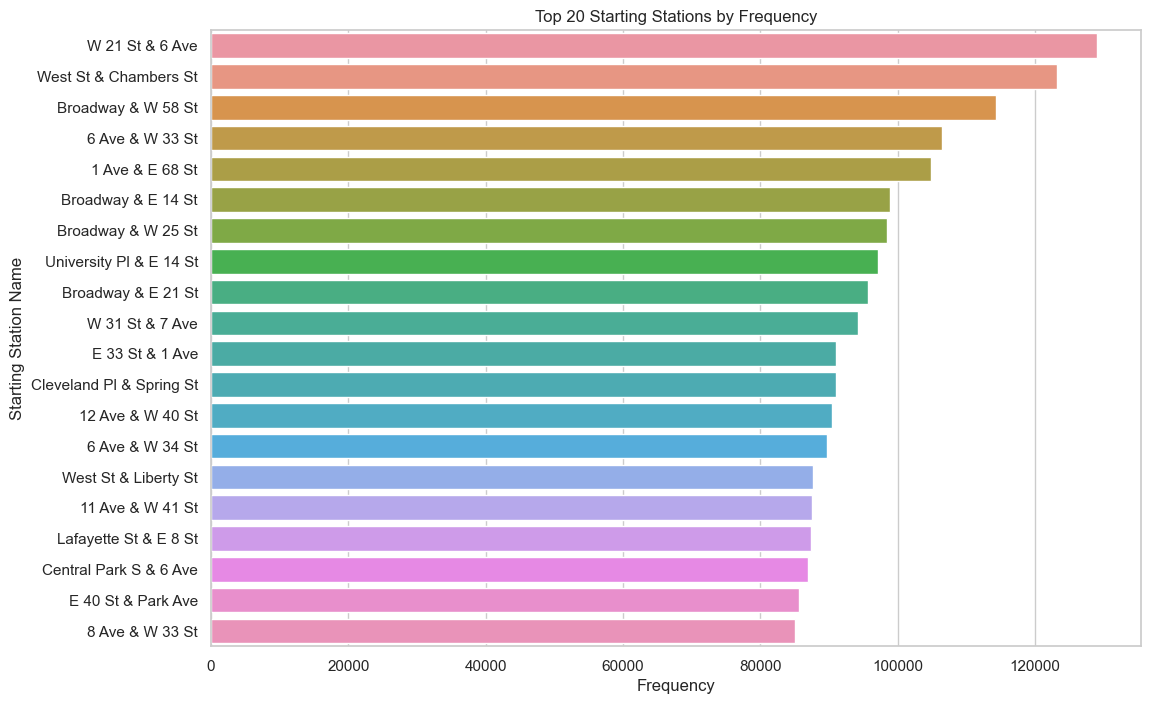

In [25]:
# plot bar chart of top 20 starting stations

plt.figure(figsize=(12, 8))
sns.barplot(x='start_station_count', y='start_station_name', data=top20)
plt.title('Top 20 Starting Stations by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Starting Station Name')
plt.show()

In [26]:
df_e = df.groupby('end_station_name').size().reset_index(name='end_station_count')

In [27]:
df_e.head()

,end_station_name,end_station_count
0,1 Ave & E 110 St,21621
1,1 Ave & E 16 St,66392
2,1 Ave & E 18 St,70485
3,1 Ave & E 30 St,45993
4,1 Ave & E 39 St,52693


In [28]:
top20_e = df_e.nlargest(20, 'end_station_count')

In [29]:
top20_e.head(25)

,end_station_name,end_station_count
1663,W 21 St & 6 Ave,130178
1796,West St & Chambers St,124336
514,Broadway & W 58 St,110313
8,1 Ave & E 68 St,105121
291,6 Ave & W 33 St,104937
1586,University Pl & E 14 St,99178
504,Broadway & W 25 St,98745
480,Broadway & E 14 St,98272
482,Broadway & E 21 St,95512
1679,W 31 St & 7 Ave,94110


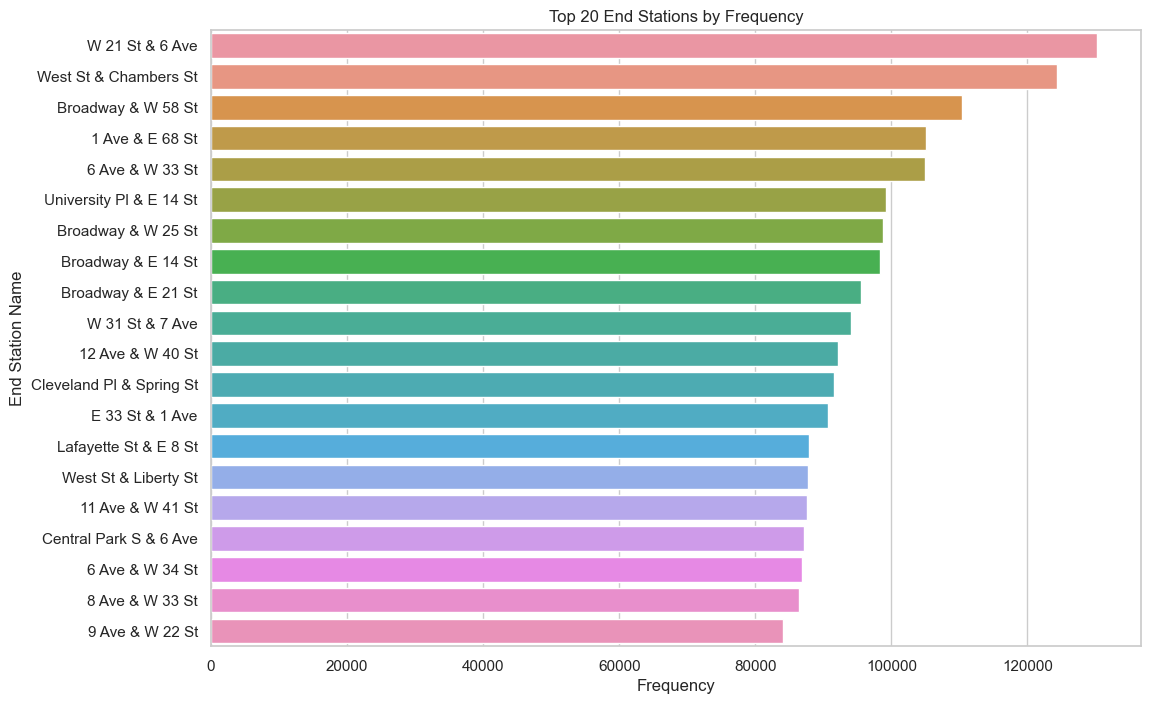

In [30]:
# plot bar chart of top 20 starting stations

plt.figure(figsize=(12, 8))
sns.barplot(x='end_station_count', y='end_station_name', data=top20_e)
plt.title('Top 20 End Stations by Frequency')
plt.xlabel('Frequency')
plt.ylabel('End Station Name')
plt.show()

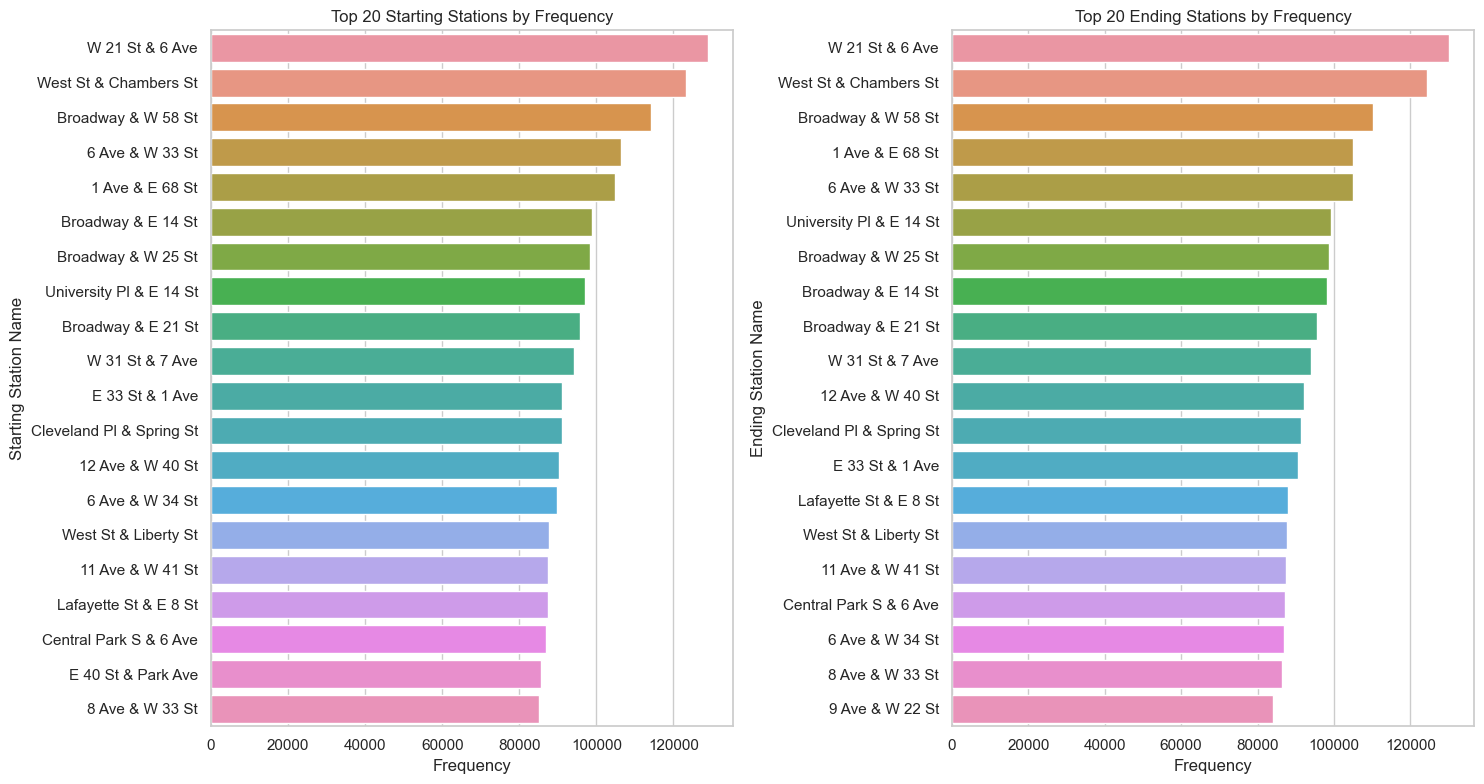

In [31]:
# Set up the figure and axes for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot the first bar chart for the top 20 starting stations
sns.barplot(x='start_station_count', y='start_station_name', data=top20, ax=axes[0])
axes[0].set_title('Top 20 Starting Stations by Frequency')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Starting Station Name')

# Plot the second bar chart for the top 20 ending stations
sns.barplot(x='end_station_count', y='end_station_name', data=top20_e, ax=axes[1])
axes[1].set_title('Top 20 Ending Stations by Frequency')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Ending Station Name')

# Adjust layout to ensure there’s no overlap
plt.tight_layout()
plt.show()

### Does the color palette you chose when you set the theme in the previous step make sense in this plot?
    I believe that the selected whitegrid theme and set2 color palette makes visual sense and allows the above top and bottom 20 stations to be easily separated for users. The set2 palette allows a soft range of colors to help readers easily identify different stations for quick comparison and good readability. 

## Box plot of categorical variable

In [32]:
df.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp',
       'number_of_rides', '_merge', 'tripduration', 'gender'],
      dtype='object')

In [33]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,number_of_rides,_merge,tripduration,gender
ride_id,,,,,,,,,,,,,,,,,,
BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0,33598,both,8.801183,male
096AE4C21473D1D6,electric_bike,2022-01-21 20:32:55.968,2022-01-21 20:35:20.227,Riverside Dr & W 91 St,7524.16,Riverside Dr & W 82 St,7388.10,40.793135,-73.977004,40.787209,-73.981281,member,2022-01-21,-6.0,33598,both,2.404317,female
B3996D7CAEDF7B92,classic_bike,2022-01-21 09:14:04.856,2022-01-21 09:18:53.000,Henry St & Atlantic Ave,4531.05,Clinton St & Tillary St,4748.07,40.690893,-73.996123,40.696233,-73.991421,member,2022-01-21,-6.0,33598,both,4.802400,male
83AE874442FFF355,electric_bike,2022-01-21 17:30:27.244,2022-01-21 17:36:00.300,Cleveland Pl & Spring St,5492.05,Rivington St & Ridge St,5406.02,40.722104,-73.997249,40.718502,-73.983299,member,2022-01-21,-6.0,33598,both,5.550933,female
8B1950B6ED5BD50A,electric_bike,2022-01-21 10:12:57.242,2022-01-21 10:31:37.016,1 Ave & E 62 St,6753.08,Allen St & Rivington St,5414.06,40.761227,-73.960940,40.720196,-73.989978,member,2022-01-21,-6.0,33598,both,18.662900,male


### Box plot for rideable_type by tripduration

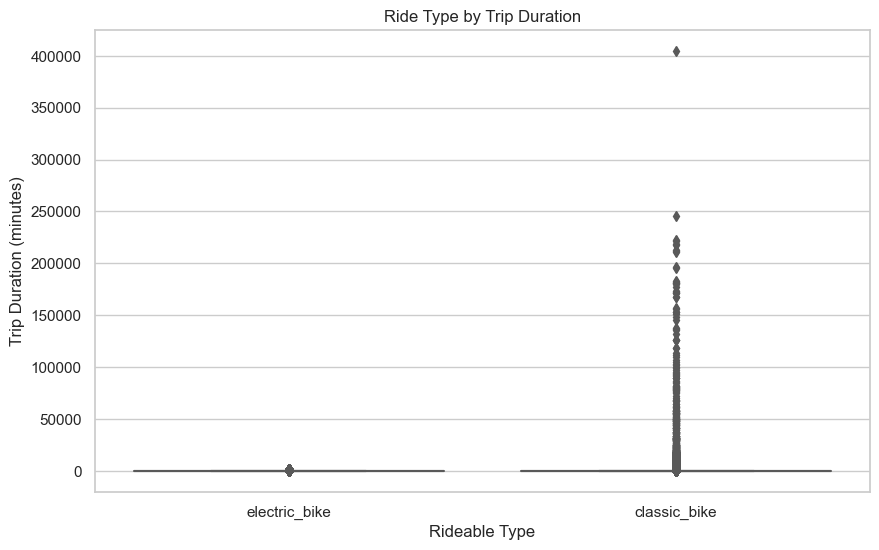

In [34]:
# Box plot of rideable_type vs tripduration

plt.figure(figsize=(10, 6))
sns.boxplot(x='rideable_type', y='tripduration', data=df)
plt.title('Ride Type by Trip Duration')
plt.xlabel('Rideable Type')
plt.ylabel('Trip Duration (minutes)')
plt.show()

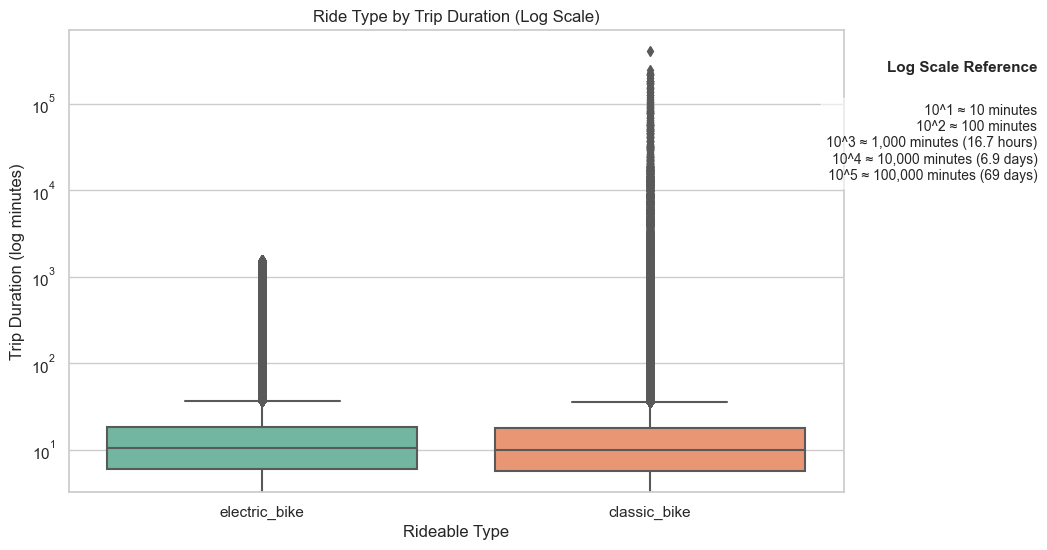

In [35]:
# Box plot of rideable_type vs tripduration using logarithmic scale

plt.figure(figsize=(10, 6))

sns.boxplot(x='rideable_type', y='tripduration', data=df)
plt.yscale('log')  # Apply a logarithmic scale to the y-axis

plt.title('Ride Type by Trip Duration (Log Scale)')
plt.xlabel('Rideable Type')
plt.ylabel('Trip Duration (log minutes)')

# Add legend title
plt.text(2, 10**5.5, 'Log Scale Reference\n', ha='right', va='top', fontsize=11, weight='bold')

# Add custom legend
plt.text(2, 10**5, '10^1 ≈ 10 minutes\n10^2 ≈ 100 minutes\n10^3 ≈ 1,000 minutes (16.7 hours)\n'
         '10^4 ≈ 10,000 minutes (6.9 days)\n10^5 ≈ 100,000 minutes (69 days)',
         ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

### What does this plot tell you about the variable? 
    For both electric and classic bikes, the majority of trips are clustered around the lower end of the duration spectrum, with trip durations predominantly ranging in the durations around 10 to 100 minutes. The noticeable difference between the two ride types is that classic bikes display a higher median trip duration over electric bikes. This suggests that users tend to take longer trips on classic bikes which could be due to the batteries required on electric bikes not lasting for the duration of longer trips. Therefore, users may be opting to use classic bikes to counter this situation. Additionally, there are more extreme outliers for classic bikes, indicating a few very long trips, while electric bikes have fewer of these extended-duration outliers.

### Box plot of rideable_type by Average Temperature

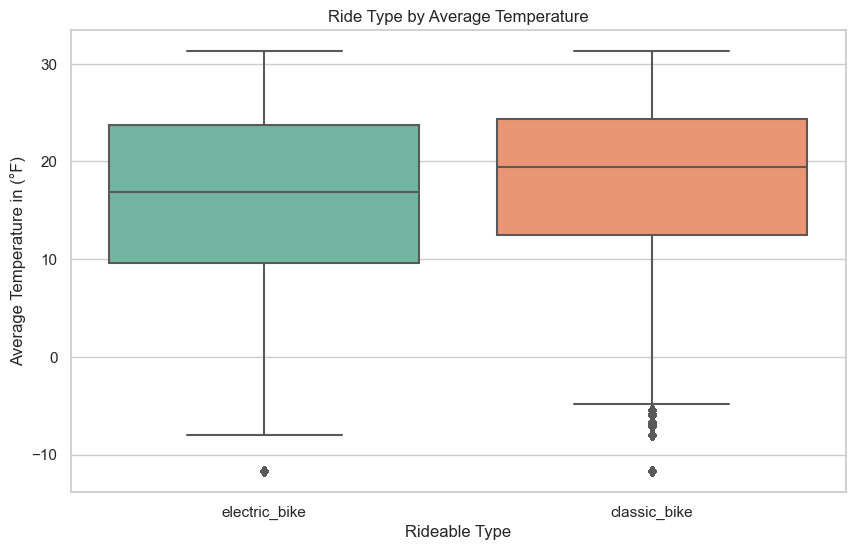

In [36]:
# Box plot of rideable_type vs avgTemp

plt.figure(figsize=(10, 6))
sns.boxplot(x='rideable_type', y='avgTemp', data=df)
plt.title('Ride Type by Average Temperature')
plt.xlabel('Rideable Type')
plt.ylabel('Average Temperature in (°F)')
plt.show()

### What does this plot tell you about the variable?
    Both types have a similar range of temperatures, with interquartile ranges between approximately 10°F and 25°F. The median temperature for electric bikes is slightly lower than for classic bikes, indicating that electric bikes might be used more frequently in colder conditions. Outliers below 0°F for both bike types suggest that some rides occurred during unusually low temperatures. Overall, the box plots show that both bike types are used consistently across a wide range of average temperatures. Based the box plots, it could be seen that including winter tires during low temperatures could see more usage and provide users with extra safety during commutes. 

### Box plot using member_casual by tripduration

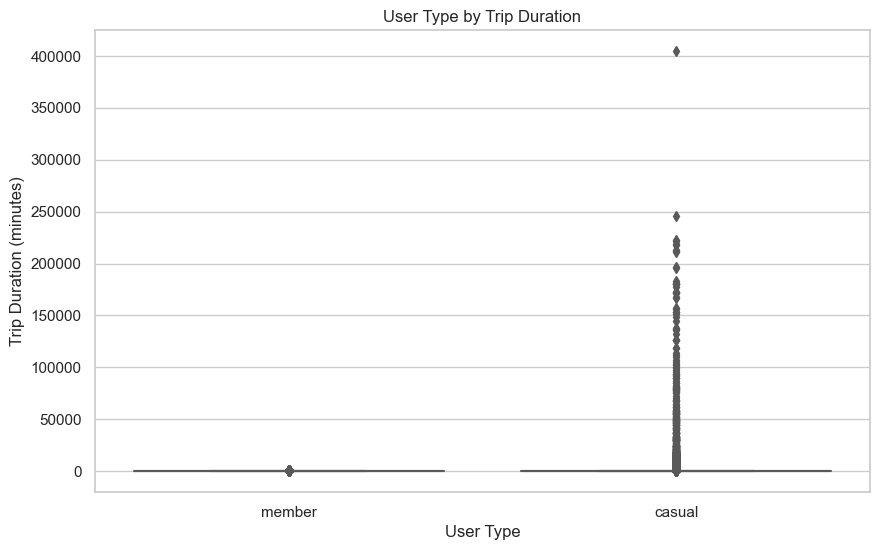

In [37]:
# Box plot of member_casual vs tripduration

plt.figure(figsize=(10, 6))
sns.boxplot(x='member_casual', y='tripduration', data=df)
plt.title('User Type by Trip Duration')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.show()

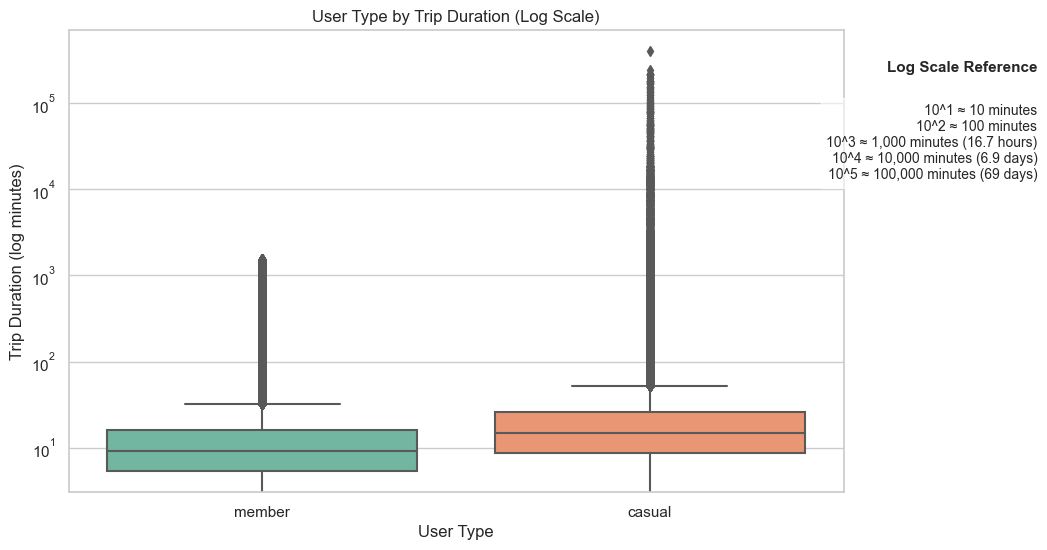

In [38]:
# Box plot of member_casual vs tripduration using logarithmic scale

plt.figure(figsize=(10, 6))

sns.boxplot(x='member_casual', y='tripduration', data=df)
plt.yscale('log')  # Apply a logarithmic scale to the y-axis

plt.title('User Type by Trip Duration (Log Scale)')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (log minutes)')

# Add legend title
plt.text(2, 10**5.5, 'Log Scale Reference\n', ha='right', va='top', fontsize=11, weight='bold')

# Add custom legend
plt.text(2, 10**5, '10^1 ≈ 10 minutes\n10^2 ≈ 100 minutes\n10^3 ≈ 1,000 minutes (16.7 hours)\n'
         '10^4 ≈ 10,000 minutes (6.9 days)\n10^5 ≈ 100,000 minutes (69 days)',
         ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

### What does this plot tell you about the variable?
    The box plot shows that member users tend to have shorter trip durations as shown by the lower median and smaller interquartile range compared to casual users. Members tend to show a trip duration ranging from around five to twelve mintue durations. Casual users show a wider spread, with higher median trip durations and more extreme outliers, suggesting they may engage in longer, less frequent trips. Casual users tend to see their trips ranging from ten to fiftenns minutes trip durations. Despite the wide range of trip durations, both user types concentrate their usage on shorter trips, suggesting that both members and casual users primarily rely on the bike service for short-distance routes.

### Box plot of member_casual by average temperature

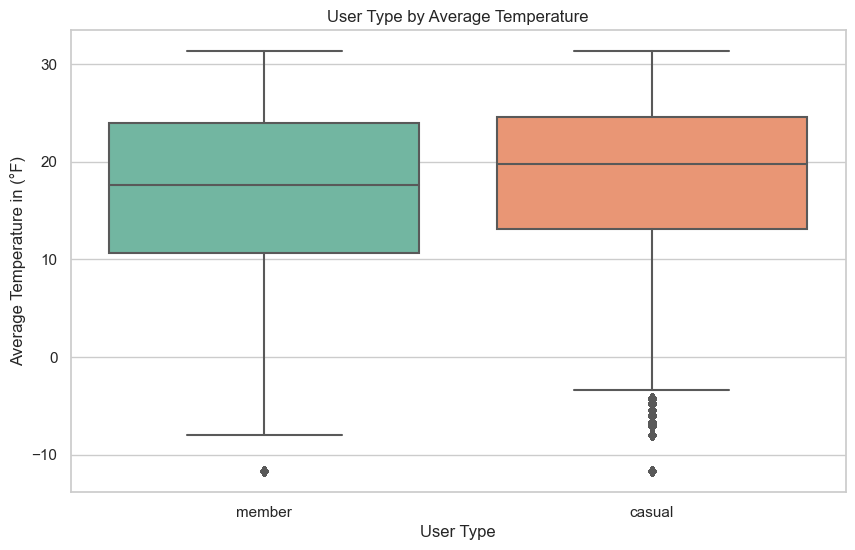

In [39]:
# Box plot of member_casual vs avgTemp

plt.figure(figsize=(10, 6))
sns.boxplot(x='member_casual', y='avgTemp', data=df)
plt.title('User Type by Average Temperature')
plt.xlabel('User Type')
plt.ylabel('Average Temperature in (°F)')
plt.show()

### What does this plot tell you about the variable?
    The box plots show that both memeber and casual usage revovles around similar temperature ranges, primarily ranging between 10°F and 25°F. Casual users tend show slightly more activity at higher temperatures than members based on the median temperature, which may suggest casual users have a preferred preference for warmer days compared to member users.Both users show some variability, with interquartile ranges covering a broad span of temperatures, but it can be seen that casual users tend to see more outliers at extreme low-temperatures due to their preferred usage at warmer temperatures. Overall, the plot suggests that both types of users have similar temperature preferences, though casual users might be less willing to ride in extreme cold than members.

## Creating FacetGrid

In [40]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,number_of_rides,_merge,tripduration,gender
ride_id,,,,,,,,,,,,,,,,,,
BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0,33598,both,8.801183,male
096AE4C21473D1D6,electric_bike,2022-01-21 20:32:55.968,2022-01-21 20:35:20.227,Riverside Dr & W 91 St,7524.16,Riverside Dr & W 82 St,7388.10,40.793135,-73.977004,40.787209,-73.981281,member,2022-01-21,-6.0,33598,both,2.404317,female
B3996D7CAEDF7B92,classic_bike,2022-01-21 09:14:04.856,2022-01-21 09:18:53.000,Henry St & Atlantic Ave,4531.05,Clinton St & Tillary St,4748.07,40.690893,-73.996123,40.696233,-73.991421,member,2022-01-21,-6.0,33598,both,4.802400,male
83AE874442FFF355,electric_bike,2022-01-21 17:30:27.244,2022-01-21 17:36:00.300,Cleveland Pl & Spring St,5492.05,Rivington St & Ridge St,5406.02,40.722104,-73.997249,40.718502,-73.983299,member,2022-01-21,-6.0,33598,both,5.550933,female
8B1950B6ED5BD50A,electric_bike,2022-01-21 10:12:57.242,2022-01-21 10:31:37.016,1 Ave & E 62 St,6753.08,Allen St & Rivington St,5414.06,40.761227,-73.960940,40.720196,-73.989978,member,2022-01-21,-6.0,33598,both,18.662900,male


### Facetgrid using rideable_type and tripduration

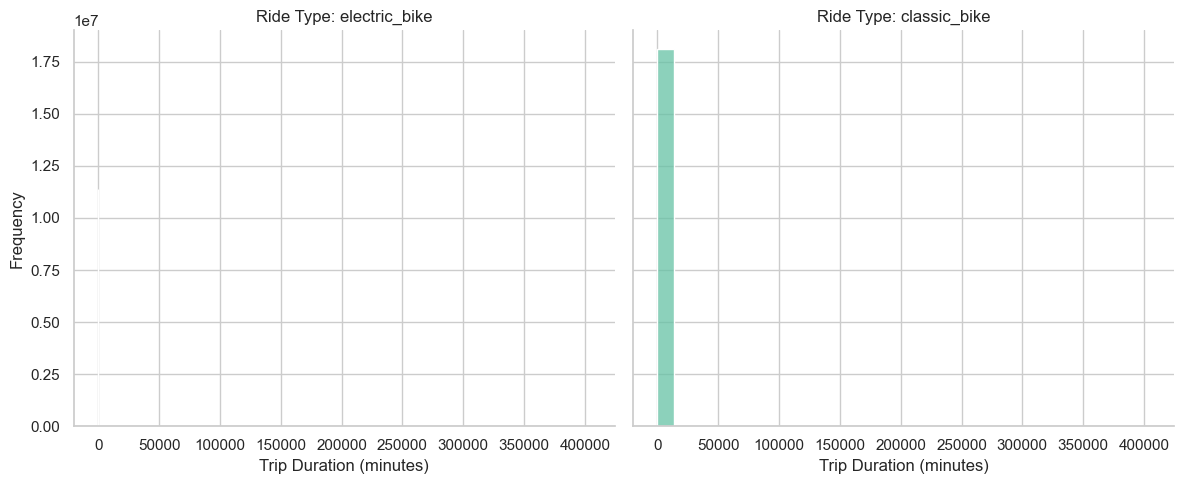

In [41]:
# creating facetgrid using rideable_type by tripduration

grid = sns.FacetGrid(df, col="rideable_type", height=5, aspect=1.2)

# Map a histogram plot to the grid
grid.map(sns.histplot, "tripduration", bins=30)

# Add titles and labels
grid.set_axis_labels("Trip Duration (minutes)", "Frequency")
grid.set_titles("Ride Type: {col_name}")

# Display the plot
plt.show()

C:\Users\Drew\anaconda3\envs\New_York_CitiBike\Lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Drew\anaconda3\envs\New_York_CitiBike\Lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


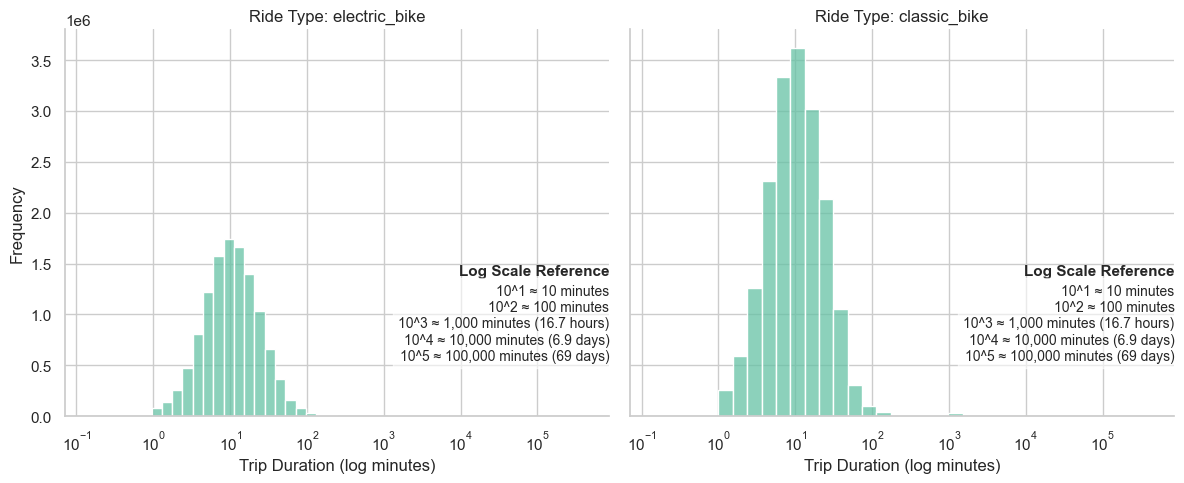

In [42]:
# Creating FacetGrid using rideable_type by tripduration using logarithmic scale
grid = sns.FacetGrid(df, col="rideable_type", height=5, aspect=1.2)

# histogram plot to the grid with log scale on the x-axis
grid.map(sns.histplot, "tripduration", bins=30, log_scale=(True, False))

# Add titles and labels
grid.set_axis_labels("Trip Duration (log minutes)", "Frequency")
grid.set_titles("Ride Type: {col_name}")

# Add a legend
for ax in grid.axes.flat:
    # Adjust legend title position and alignment
    ax.text(12**5.5, 1.5e6, 'Log Scale Reference\n', ha='right', va='top', fontsize=11, weight='bold')
    
    # Adjust legend details position
    ax.text(12**5.5, 1.3e6, '10^1 ≈ 10 minutes\n10^2 ≈ 100 minutes\n10^3 ≈ 1,000 minutes (16.7 hours)\n'
            '10^4 ≈ 10,000 minutes (6.9 days)\n10^5 ≈ 100,000 minutes (69 days)',
            ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

# Display the plot
plt.show()

### How plot makes sense to aid in analysis questions(previous task assignment) in the project. 2-3 sentences analyzing what insight graphs bring.
    The facetGrid visualization helps address questions around "How does the average trip duration differ between ride types?" and "What patterns exist in trip durations based on bike type?"

    Insight: The FacetGrid reveals that both bike types are most frequently used for shorter trips (within the 10–100 minute range). Classic bikes exhibit a wider spread and higher frequency of longer trip durations than electric bikes that suggests users prefer classic bikes for longer or less frequent trips, while electric bikes tend to be used by users for shorter trips. This insight can provide valuable for operational planning and could help optimize biki inventory based on expected trip patterns.

### Facetgrid using rideable_type and average temperature

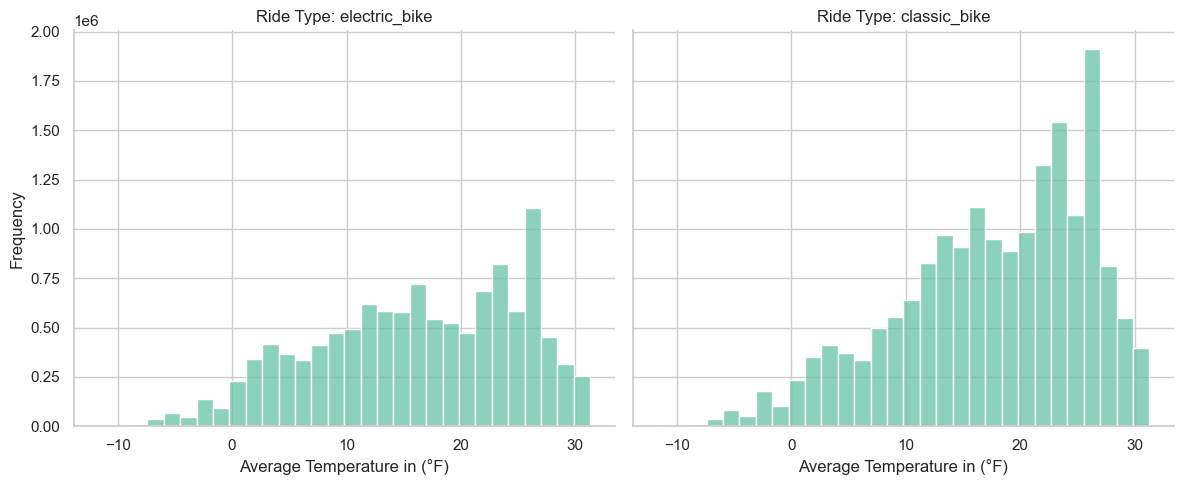

In [48]:
# creating facetgrid using reideable_type by average temperature

grid = sns.FacetGrid(df, col="rideable_type", height=5, aspect=1.2)

# Map a histogram plot to the grid
grid.map(sns.histplot, "avgTemp",bins=30)

# Add titles and labels
grid.set_axis_labels("Average Temperature in (°F)", "Frequency")
grid.set_titles("Ride Type: {col_name}")

# Display the plot
plt.show()

### How plot makes sense to aid in analysis questions(previous task assignment) in the project. 2-3 sentences analyzing what insight graphs bring.
    The facetgrid visualization helps address the question, "How does weather impact ridership?" by illustrating which temperatures are most common for rides based on the bike type. The temperature distribution can indicate user preferences for ride types based on weather conditions and whether bike type perffernces in specific temperature ranges.

    Insight: The FacetGrid reveals that both electric and classic bikes are commonly used across similar temperature ranges with a noticeable increase in frequency at higher temperatures. There appears to be a notable increase in usage at higher temperatures betwwen 20-30°F. Classic bikes exhibit a slightly wider distribution that indicates this bike type in a wider range of temperatures. This insight can help in optimizing bike distribution based on expected weather conditions, aligning with rider preferences for each bike type.

### Facetgrid using member_casual and tripduration

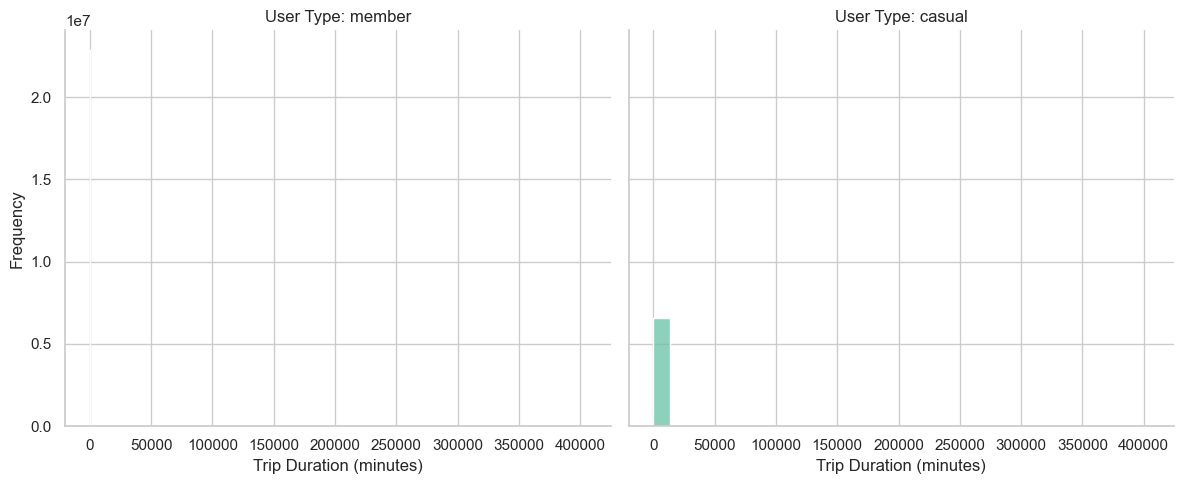

In [44]:
# creating facetgrid using member_casual by tripduration

grid = sns.FacetGrid(df, col="member_casual", height=5, aspect=1.2)

# Map a histogram plot to the grid
grid.map(sns.histplot, "tripduration", bins=30)

# Add titles and labels
grid.set_axis_labels("Trip Duration (minutes)", "Frequency")
grid.set_titles("User Type: {col_name}")

# Display the plot
plt.show()

C:\Users\Drew\anaconda3\envs\New_York_CitiBike\Lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Drew\anaconda3\envs\New_York_CitiBike\Lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


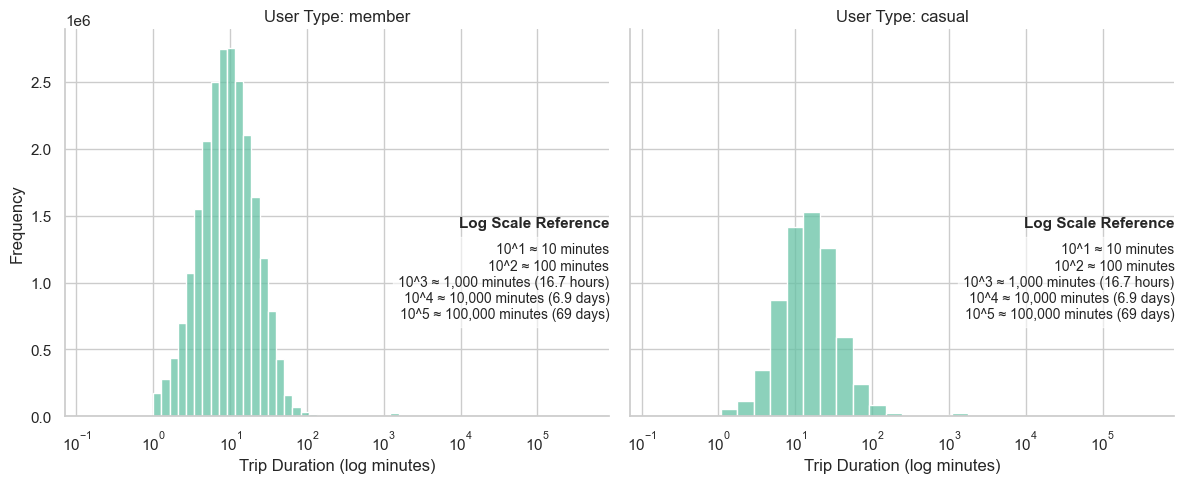

In [45]:
# Creating FacetGrid using member_casual by tripduration using logarithmic scale
grid = sns.FacetGrid(df, col="member_casual", height=5, aspect=1.2)

# histogram plot to the grid with log scale on the x-axis
grid.map(sns.histplot, "tripduration", bins=30, log_scale=(True, False))

# Add titles and labels
grid.set_axis_labels("Trip Duration (log minutes)", "Frequency")
grid.set_titles("User Type: {col_name}")

# Add a legend
for ax in grid.axes.flat:
    # Adjust legend title position and alignment
    ax.text(12**5.5, 1.5e6, 'Log Scale Reference\n', ha='right', va='top', fontsize=11, weight='bold')
    
    # Adjust legend details position
    ax.text(12**5.5, 1.3e6, '10^1 ≈ 10 minutes\n10^2 ≈ 100 minutes\n10^3 ≈ 1,000 minutes (16.7 hours)\n'
            '10^4 ≈ 10,000 minutes (6.9 days)\n10^5 ≈ 100,000 minutes (69 days)',
            ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

# Display the plot
plt.show()

### How plot makes sense to aid in analysis questions(previous task assignment) in the project. 2-3 sentences analyzing what insight graphs bring.
    The facetgrid visualization helps address the questions "How does the average trip duration differ between user types?" and "What patterns exist in trip durations based on user type?" The facetgrid reveals tendencies in usage patterns, such as whether casual users prefer shorter or longer trips compared to members.

    Insight: The facetgrid portrays that both member and casual users have similar peak trip durations ranging 10 to 100 minutes. Casual users appear to show a broader range and higher frequency of longer trip durations than member users despite their fewer frequency in trips. This can suggest that casual users may use the service less frequently but will use it for potentially longer trips. This insight could be notable for ensuring adequate availability for both short and extended trips depending on the user type.

### Facetgrid using member_casual and average temperature

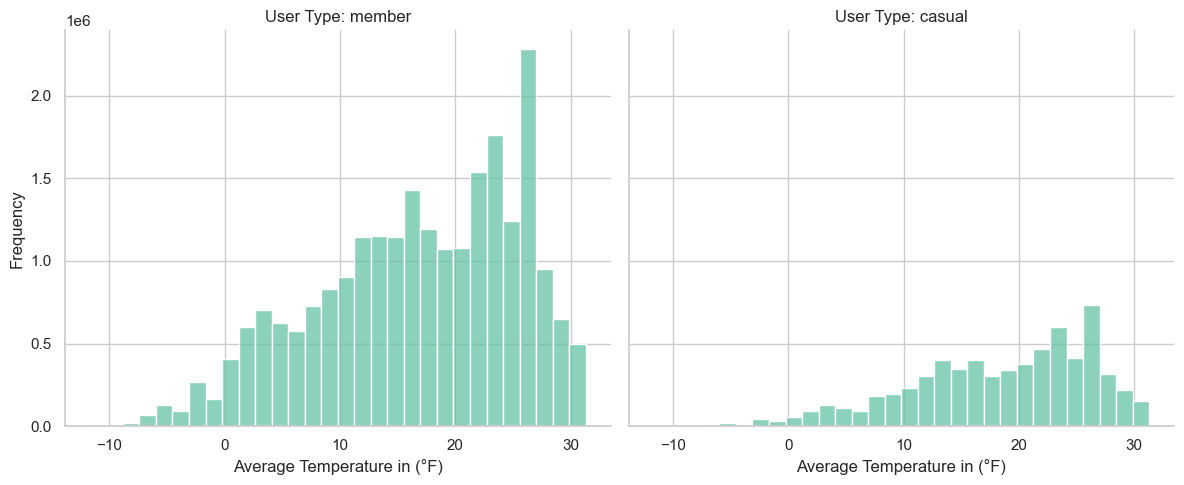

In [47]:
# creating facetgrid using member_casual by average temperature

grid = sns.FacetGrid(df, col="member_casual", height=5, aspect=1.2)

# Map a histogram plot to the grid
grid.map(sns.histplot, "avgTemp",bins=30)

# Add titles and labels
grid.set_axis_labels("Average Temperature in (°F)", "Frequency")
grid.set_titles("User Type: {col_name}")

# Display the plot
plt.show()

### How plot makes sense to aid in analysis questions(previous task assignment) in the project. 2-3 sentences analyzing what insight graphs bring.

    The facetgrid visualization helps address the question"How does weather impact ridership?" through revealing patterns of user temperature preference. This visualization allows the observation of user tendencies based on weather conditions and its affect on ride frequency.

    Insight: The facetgrid shows that both user types (member and casual) are active over a broad range of temperatures. The graphs show that members appear to show a higher frequency of trips during warmer temperatures with a notable peak around the temperature ranges of 25-30°F. Casual users appear to show less overall trip frequency, but the ride usage shows to be of a more stable pattern over the temperature ranges. This information can help in learning about user prefernences in relation to their user's tendencies to temperature allowing specific promotions and bike inventory management.